IMPORTS

In [103]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Loading opinions from .json files


In [104]:
print(*[filename.split(".")[0] for filename in os.listdir("./opinions")], sep = "\n")

140915932
28217807
84514582


In [105]:
product_id = input("enter priduct d")

In [106]:
opinions = pd.read_json(f"./opinions/{product_id}.json")


### Basic statistics

In [107]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros_pl.astype(bool).sum()
cons_count = opinions.cons_pl.astype(bool).sum()
pros_cons_count = opinions.apply(lambda o: bool(o.pros_pl) and bool(o.cons_pl), axis=1).sum()
average_rate = opinions.stars.mean()


print(f"the average rate of the product: {average_rate:.2f}")
print(f"the number of opinions of the product: {opinions_count}")
print(f"the number of positive opinions of the product: {pros_count}")
print(f"the number of nagative opinions of the product: {cons_count}")
print(f"the average count of cons and pros of the product: {cons_count}")


pros = opinions.pros_en.explode().value_counts()
cons = opinions.cons_en.explode().value_counts()


the average rate of the product: 4.63
the number of opinions of the product: 27
the number of positive opinions of the product: 13
the number of nagative opinions of the product: 1
the average count of cons and pros of the product: 1


### Charts

In [108]:
recommendations = opinions.recommendation.value_counts(dropna = False).reindex([False, True, np.nan], fill_value = 0.0)
recommendations

recommendation
False     0.0
True      0.0
NaN      27.0
Name: count, dtype: float64

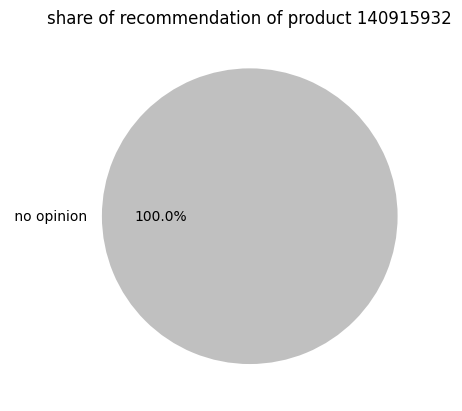

In [114]:
recommendations.plot.pie(
    label = "",
    labels = ["Not recommend", "recommend", " no opinion"],
    colors = ["red", "green", "silver"],
    autopct = lambda v: f"{v:.1f}%" if v > 0 else "",
    title = f"share of recommendation of product {product_id}"
)
plt.show()